### aim: 

### date: 

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [1]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr
import sys
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE')
#list of models
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/UTILS')
import lom
import utils as ut

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater
import time
plt.rcParams.update({'font.size': 12})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 12}

plt.rc('font', **font)

## the carbon jump in CAL12-GEL

In [4]:

plt.rc('font', **font)

mod = {
    '1A': {
        'hist_str': 'bc370',
        'fut_str': 'be682',
        'name': 'HIST.OZONE \n LOW TEMP.',
        'name2':'1A: NatlOzone-SSP126',
        'color':'#E8D215',
        'runid':'TOM12_TJ_1AA1'},
    '1B': {
        'hist_str': 'bc370',
        'fut_str': 'ce417',
        'name': 'HIST. OZONE \n HIGH TEMP.',
        'name2':'1B: NatlOzone-SSP370',
        'color':'#87800A',
        'runid':'TOM12_TJ_1BA1'},
    '2A': {
        'hist_str': 'cj198',
        'fut_str': 'cj880',
        'name': 'FIXED OZONE \n LOW TEMP.',
        'name2':'2A: Ozone1950-SSP126',
        'color':'#2DC18E',
        'runid':'TOM12_TJ_2AA1'},
    '2B': {
        'hist_str': 'cj198',
        'fut_str': 'cj881',
        'name': 'FIXED OZONE \n HIGH TEMP.',
        'name2':'2B: Ozone1950-SSP370',
        'color':'#18765C',
        'runid':'TOM12_TJ_2BA1'},
    '3A': {
        'hist_str': 'cj200',
        'fut_str': 'cj484',
        'name': '1990 OZONE \n LOW TEMP.',
        'name2':'3A: Ozone1990-SSP126',
        'color':'#FF462B',
        'runid':'TOM12_TJ_3AA1'},
    '3B': {
        'hist_str': 'cj200',
        'fut_str': 'cj504',
        'name': '1990 OZONE \n HIGH TEMP.',
        'name2':'3B: Ozone1990-SSP370',
        'color':'#822722',
        'runid':'TOM12_TJ_3BA1'},
    'PI': {
        'hist_str': '',
        'fut_str': '',
        'name': 'PI OZONE \n PI TEMP.',
        'name2':'PI: OzonePI-PI',
        'color':'silver',
        'runid':'TOM12_TJ_PIA1'}
}


1A
1B
2A
2B
3A
3B


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


PI


<Figure size 432x288 with 0 Axes>

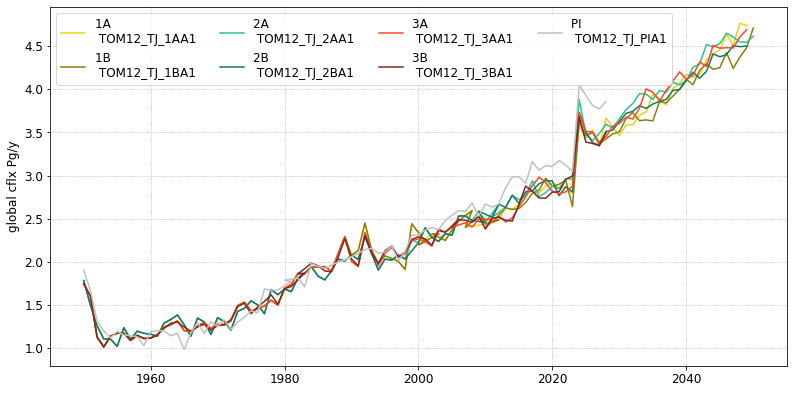

In [5]:
models = ['1A','1B','2A','2B','3A','3B','PI',\
         ]

tvar = 'Cflx_total'
ttit = 'Cflx, pgC_yr'

plt.figure()

fact = 1.1
fig, axs = plt.subplots(1,1, figsize=(12*fact, 6*fact), facecolor='w', edgecolor='k')
# axs = axs.ravel()

ind = 0
for i in range(0,len(models)):
    tmod = models[i]
    print(tmod)
    trunid = mod[tmod]['runid']
    
    tdat = pd.read_csv(f'/gpfs/home/mep22dku/scratch/ModelRuns//{trunid}/breakdown.sur.annual.dat', sep='\t')
    tcol = mod[tmod]['color']
    tlin = '-'#mod[tmod]['linestyle']
    tdesc = mod[tmod]['runid']

    tdat = pd.read_csv(f'/gpfs/home/mep22dku/scratch/ModelRuns//{trunid}/breakdown.sur.annual.dat', sep='\t')
    year = tdat.year[2:].to_numpy().astype(float)
    Cflx_total = tdat.Cflx[2:].to_numpy().astype(float)
    filt = (year>1700)
    axs.plot(year[filt],Cflx_total[filt], linestyle = tlin, color = tcol, label = f'{tmod} \n {tdesc}')

    axs.legend(ncol = 4, loc = 'best', fontsize = 12)
    axs.set_ylabel('global cflx Pg/y')
    axs.grid(linestyle = ':')

fig.savefig('./figs/Cflx_monitor.jpg')

## when does jump occur? 2023 to 2024

1A
1B
2A
2B
3A
3B
PI


<Figure size 432x288 with 0 Axes>

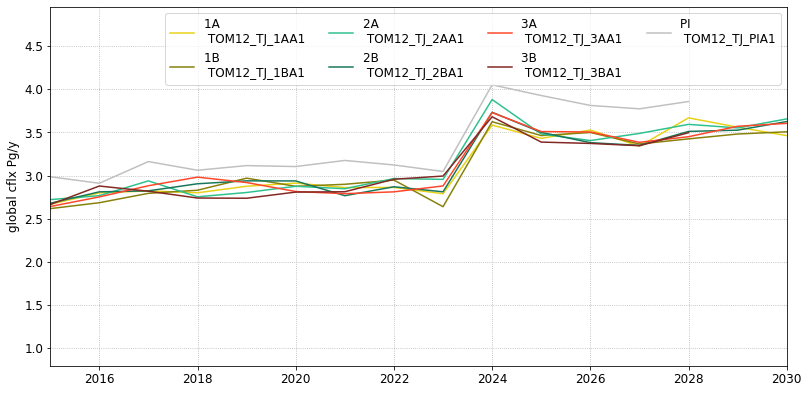

In [6]:
models = ['1A','1B','2A','2B','3A','3B','PI',\
         ]

tvar = 'Cflx_total'
ttit = 'Cflx, pgC_yr'

plt.figure()

fact = 1.1
fig, axs = plt.subplots(1,1, figsize=(12*fact, 6*fact), facecolor='w', edgecolor='k')
# axs = axs.ravel()

ind = 0
for i in range(0,len(models)):
    tmod = models[i]
    print(tmod)
    trunid = mod[tmod]['runid']
    
    tdat = pd.read_csv(f'/gpfs/home/mep22dku/scratch/ModelRuns//{trunid}/breakdown.sur.annual.dat', sep='\t')
    tcol = mod[tmod]['color']
    tlin = '-'#mod[tmod]['linestyle']
    tdesc = mod[tmod]['runid']

    tdat = pd.read_csv(f'/gpfs/home/mep22dku/scratch/ModelRuns//{trunid}/breakdown.sur.annual.dat', sep='\t')
    year = tdat.year[2:].to_numpy().astype(float)
    Cflx_total = tdat.Cflx[2:].to_numpy().astype(float)
    filt = (year>1700)
    axs.plot(year[filt],Cflx_total[filt], linestyle = tlin, color = tcol, label = f'{tmod} \n {tdesc}')

    axs.legend(ncol = 4, loc = 'best', fontsize = 12)
    axs.set_ylabel('global cflx Pg/y')
    axs.grid(linestyle = ':')
    axs.set_xlim([2015,2030])

#fig.savefig('./figs/Cflx_monitor.jpg')

### how does UKESM do for these jumps (from netcdfs, not regridded)

In [7]:
extract = False
if extract:
    scendict = {
        # Baynes Sound
        '1A': {
            'hist_str': 'bc370',
            'fut_str': 'be682',
            'name': 'HIST.OZONE \n LOW TEMP.',
            'name2':'1A: NatlOzone-SSP126',
            'color':'#E8D215',
            'color2':'orange'},
        '1B': {
            'hist_str': 'bc370',
            'fut_str': 'ce417',
            'name': 'HIST. OZONE \n HIGH TEMP.',
            'name2':'1B: NatlOzone-SSP370',
            'color':'#87800A',
            'color2':'orangered'},
        '2A': {
            'hist_str': 'cj198',
            'fut_str': 'cj880',
            'name': 'FIXED OZONE \n LOW TEMP.',
            'name2':'2A: Ozone1950-SSP126',
            'color':'#2DC18E',
            'color2':'mediumseagreen'},
        '2B': {
            'hist_str': 'cj198',
            'fut_str': 'cj881',
            'name': 'FIXED OZONE \n HIGH TEMP.',
            'name2':'2B: Ozone1950-SSP370',
            'color':'#18765C',
            'color2':'green'},
        '3A': {
            'hist_str': 'cj200',
            'fut_str': 'cj484',
            'name': '1990 OZONE \n LOW TEMP.',
            'name2':'3A: Ozone1990-SSP126',
            'color':'#FF462B',
            'color2':'dodgerblue'},
        '3B': {
            'hist_str': 'cj200',
            'fut_str': 'cj504',
            'name': '1990 OZONE \n HIGH TEMP.',
            'name2':'3B: Ozone1990-SSP370',
            'color':'#822722',
            'color2':'mediumblue'}
    }

    def make_yearlist_ukesm(yrst, yren, tscen, dtype = 'grid-T'):
        print(f'SCENARIO {tscen}')
        dslist = []

        for y in range(yrst,yren):
            if ((y<1990) & ((tscen == '3A') | (tscen == '3B'))):
                tstr = scendict['1A']['hist_str']
            elif y<2015:
                tstr = scendict[tscen]['hist_str']

            else:
                tstr = scendict[tscen]['fut_str']

            try:
                td = glob.glob(f'/gpfs/data/greenocean/software/resources/MEDUSA/PROC2/*{tstr}*{y}*{dtype}*')
                dslist.append(td[0])
            except:
                pass
                print(f'FAIL {tscen},{tstr}, {y}')
        return dslist


    ### 
    ukmesh = xr.open_dataset('/gpfs/data/greenocean/software/resources/MEDUSA/mesh_mask_eORCA1_wrk.nc')
    ukmesh['area'] = ukmesh.tmask[0,:,:] * ukmesh.e1t[:,:] * ukmesh.e2t[:,:]
    #print('lol yes the area is correct now')

    ukesm1A = (make_yearlist_ukesm(1950,2100,'1A', dtype = 'aux'))
    ukesm1B = (make_yearlist_ukesm(1950,2100,'1B', dtype = 'aux'))
    ukesm2A = (make_yearlist_ukesm(1950,2100,'2A', dtype = 'aux'))
    ukesm2B = (make_yearlist_ukesm(1950,2100,'2B', dtype = 'aux'))
    ukesm3A = (make_yearlist_ukesm(1950,2100,'3A', dtype = 'aux'))
    ukesm3B = (make_yearlist_ukesm(1950,2100,'3B', dtype = 'aux'))

    def get_yearly_co2(ukesmlist, savenam):
        print(savenam)
        time1 = time.time()
        print(len(ukesmlist))
        cflx_array = np.zeros(len(ukesmlist))
        year = np.zeros(len(ukesmlist))
        for i in range(0,len(ukesmlist)):
            if i%10 == 0:
                print(i)
            test = xr.open_dataset(ukesmlist[i])
            byarea = test.CO2FLUX*ukmesh.area
            timed = byarea.sum(dim = ['y', 'x']) #
            timed_mmol_day = timed.groupby('time_counter.year').mean() * 1e-18 * 365 * 12 #mmol/day to pG/year
            year[i] = (timed_mmol_day.year.values)
            print(year[i])
            cflx_array[i] = (timed_mmol_day.values)


        data_vars = {'Cflx':(['year'], cflx_array,
        {'units': 'Pg/yr',
        'long_name':'Cflx'}),
        }
        # define coordinates
        coords = {'year': (['year'], year),
                }
        # define global attributes
        attrs = {'made in':'SOZONEwindAnalyis/oceanFields/investigate-Carbon-jump.ipynb',
        'desc': 'yearly medusa files, saving only variables of interest'
        }
        ds = xr.Dataset(data_vars=data_vars,
        coords=coords,
        attrs=attrs)
        ds.to_netcdf(savenam)

        time2 = time.time()
        print(time2-time1)

    get_yearly_co2(ukesm1A, './extracted-summary/Cflx_ukesm1A.nc')
    get_yearly_co2(ukesm1B, './extracted-summary/Cflx_ukesm1B.nc')
    get_yearly_co2(ukesm2A, './extracted-summary/Cflx_ukesm2A.nc')
    get_yearly_co2(ukesm2B, './extracted-summary/Cflx_ukesm2B.nc')
    get_yearly_co2(ukesm3A, './extracted-summary/Cflx_ukesm3A.nc')
    get_yearly_co2(ukesm3B, './extracted-summary/Cflx_ukesm3B.nc')

In [8]:

extract = False
if extract:

    def make_yearlist_tom(yrst,yren, tstr, dtype = 'diad_T'):
        print(tstr)
        
        dslist = []
        
        for y in range(yrst,yren):

            try:
                td = glob.glob(f'/gpfs/data/greenocean/software/runs/TOM12_TJ_{tstr}/*{y}0101*{dtype}*')
                dslist.append(td[0])
            except:
                pass
                print(f'FAIL {tstr}, {y}')
        return dslist



    ### 
    tmesh = xr.open_dataset('/gpfs/data/greenocean/software/resources/regrid/mesh_mask3_6.nc')
    tmesh['csize'] = tmesh.tmask[0,0,:,:] * tmesh.e1t[0,:,:] * tmesh.e2t[0,:,:]

    tom1A = (make_yearlist_tom(1950,2100,'1ASA', ))
    tom1B = (make_yearlist_tom(1950,2100,'1BSA', ))
    tom2A = (make_yearlist_tom(1950,2100,'2ASA', ))
    tom2B = (make_yearlist_tom(1950,2100,'2BSA', ))
    tom3A = (make_yearlist_tom(1950,2100,'3ASA', ))
    tom3B = (make_yearlist_tom(1950,2100,'3BSA', ))

    def get_yearly_co2_tom(tomlist, savenam):
        
        print(savenam)
        time1 = time.time()
        print(len(tomlist))
        cflx_array = np.zeros(len(tomlist))
        year = np.zeros(len(tomlist))
        for i in range(0,len(tomlist)):
            if i%10 == 0:
                print(i)
            test = xr.open_dataset(tomlist[i]) #mol/m2/s
            siy = 60*60*24*365
            byarea = test.Cflx*tmesh.csize#mol/m2/s to mol/s
            timed = byarea.sum(dim = ['y', 'x']) #mol/
            timed_mmol_day = timed.groupby('time_counter.year').mean() * 1e-15 * siy * 12 #mol/ to pG/year
            year[i] = (timed_mmol_day.year.values)
            cflx_array[i] = (timed_mmol_day.values)



        data_vars = {'Cflx':(['year'], cflx_array,
        {'units': 'Pg/yr',
        'long_name':'Cflx'}),
        }
        # define coordinates
        coords = {'year': (['year'], year),
                }
        # define global attributes
        attrs = {'made in':'SOZONEwindAnalyis/oceanFields/investigate-Carbon-jump.ipynb',
        'desc': 'yearly medusa files, saving only variables of interest'
        }
        ds = xr.Dataset(data_vars=data_vars,
        coords=coords,
        attrs=attrs)
        ds.to_netcdf(savenam)

        time2 = time.time()
        print(time2-time1)

    get_yearly_co2_tom(tom1A, './extracted-summary/Cflx_tom_1ASA.nc')
    get_yearly_co2_tom(tom1B, './extracted-summary/Cflx_tom_1BSA.nc')
    get_yearly_co2_tom(tom2A, './extracted-summary/Cflx_tom_2ASA.nc')
    get_yearly_co2_tom(tom2B, './extracted-summary/Cflx_tom_2BSA.nc')
    get_yearly_co2_tom(tom3A, './extracted-summary/Cflx_tom_3ASA.nc')
    get_yearly_co2_tom(tom3B, './extracted-summary/Cflx_tom_3BSA.nc')

In [9]:

extract = False
if extract:

    def make_yearlist_tom(yrst,yren, tstr, dtype = 'diad_T'):
        print(tstr)
        
        dslist = []
        
        for y in range(yrst,yren):

            try:
                td = glob.glob(f'/gpfs/data/greenocean/software/runs/TOM12_TJ_{tstr}/*{y}0101*{dtype}*')
                dslist.append(td[0])
            except:
                pass
                print(f'FAIL {tstr}, {y}')
        return dslist



    ### 
    tmesh = xr.open_dataset('/gpfs/data/greenocean/software/resources/regrid/mesh_mask3_6.nc')
    tmesh['csize'] = tmesh.tmask[0,0,:,:] * tmesh.e1t[0,:,:] * tmesh.e2t[0,:,:]

    tom1A = (make_yearlist_tom(1950,2100,'1AA3', ))
    tom1B = (make_yearlist_tom(1950,2100,'1BA3', ))
    tom2A = (make_yearlist_tom(1950,2100,'2AA3', ))
    tom2B = (make_yearlist_tom(1950,2100,'2BA3', ))
    tom3A = (make_yearlist_tom(1950,2100,'3AA3', ))
    tom3B = (make_yearlist_tom(1950,2100,'3BA3', ))

    def get_yearly_co2_tom(tomlist, savenam):
        
        print(savenam)
        time1 = time.time()
        print(len(tomlist))
        cflx_array = np.zeros(len(tomlist))
        year = np.zeros(len(tomlist))
        for i in range(0,len(tomlist)):
            if i%10 == 0:
                print(i)
            test = xr.open_dataset(tomlist[i]) #mol/m2/s
            siy = 60*60*24*365
            byarea = test.Cflx*tmesh.csize#mol/m2/s to mol/s
            timed = byarea.sum(dim = ['y', 'x']) #mol/
            timed_mmol_day = timed.groupby('time_counter.year').mean() * 1e-15 * siy * 12 #mol/ to pG/year
            year[i] = (timed_mmol_day.year.values)
            cflx_array[i] = (timed_mmol_day.values)



        data_vars = {'Cflx':(['year'], cflx_array,
        {'units': 'Pg/yr',
        'long_name':'Cflx'}),
        }
        # define coordinates
        coords = {'year': (['year'], year),
                }
        # define global attributes
        attrs = {'made in':'SOZONEwindAnalyis/oceanFields/investigate-Carbon-jump.ipynb',
        'desc': 'yearly meduA3 files, A3ving only variables of interest'
        }
        ds = xr.Dataset(data_vars=data_vars,
        coords=coords,
        attrs=attrs)
        ds.to_netcdf(savenam)

        time2 = time.time()
        print(time2-time1)

    get_yearly_co2_tom(tom1A, './extracted-summary/Cflx_tom_1AA3.nc')
    get_yearly_co2_tom(tom1B, './extracted-summary/Cflx_tom_1BA3.nc')
    get_yearly_co2_tom(tom2A, './extracted-summary/Cflx_tom_2AA3.nc')
    get_yearly_co2_tom(tom2B, './extracted-summary/Cflx_tom_2BA3.nc')
    get_yearly_co2_tom(tom3A, './extracted-summary/Cflx_tom_3AA3.nc')
    get_yearly_co2_tom(tom3B, './extracted-summary/Cflx_tom_3BA3.nc')

In [10]:

extract = False
if extract:

    def make_yearlist_tom(yrst,yren, tstr, dtype = 'diad_T'):
        print(tstr)
        
        dslist = []
        
        for y in range(yrst,yren):

            try:
                td = glob.glob(f'/gpfs/data/greenocean/software/runs/TOM12_TJ_{tstr}/*{y}0101*{dtype}*')
                dslist.append(td[0])
            except:
                pass
                print(f'FAIL {tstr}, {y}')
        return dslist



    ### 
    tmesh = xr.open_dataset('/gpfs/data/greenocean/software/resources/regrid/mesh_mask3_6.nc')
    tmesh['csize'] = tmesh.tmask[0,0,:,:] * tmesh.e1t[0,:,:] * tmesh.e2t[0,:,:]

    tom1A = (make_yearlist_tom(1950,2100,'1AA6', ))
    tom1B = (make_yearlist_tom(1950,2100,'1BA6', ))
    tom2A = (make_yearlist_tom(1950,2100,'2AA6', ))
    tom2B = (make_yearlist_tom(1950,2070,'2BA6', ))
    tom3A = (make_yearlist_tom(1950,2100,'3AA6', ))
    tom3B = (make_yearlist_tom(1950,2100,'3BA6', ))

    def get_yearly_co2_tom(tomlist, savenam):
        
        print(savenam)
        time1 = time.time()
        print(len(tomlist))
        cflx_array = np.zeros(len(tomlist))
        year = np.zeros(len(tomlist))
        for i in range(0,len(tomlist)):
            if i%10 == 0:
                print(i)
            test = xr.open_dataset(tomlist[i]) #mol/m2/s
            siy = 60*60*24*365
            byarea = test.Cflx*tmesh.csize#mol/m2/s to mol/s
            timed = byarea.sum(dim = ['y', 'x']) #mol/
            timed_mmol_day = timed.groupby('time_counter.year').mean() * 1e-15 * siy * 12 #mol/ to pG/year
            year[i] = (timed_mmol_day.year.values)
            cflx_array[i] = (timed_mmol_day.values)



        data_vars = {'Cflx':(['year'], cflx_array,
        {'units': 'Pg/yr',
        'long_name':'Cflx'}),
        }
        # define coordinates
        coords = {'year': (['year'], year),
                }
        # define global attributes
        attrs = {'made in':'SOZONEwindAnalyis/oceanFields/investigate-Carbon-jump.ipynb',
        'desc': 'yearly meduA6 files, A6ving only variables of interest'
        }
        ds = xr.Dataset(data_vars=data_vars,
        coords=coords,
        attrs=attrs)
        ds.to_netcdf(savenam)

        time2 = time.time()
        print(time2-time1)

    get_yearly_co2_tom(tom1A, './extracted-summary/Cflx_tom_1AA6.nc')
    get_yearly_co2_tom(tom1B, './extracted-summary/Cflx_tom_1BA6.nc')
    get_yearly_co2_tom(tom2A, './extracted-summary/Cflx_tom_2AA6.nc')
    get_yearly_co2_tom(tom2B, './extracted-summary/Cflx_tom_2BA6.nc')
    get_yearly_co2_tom(tom3A, './extracted-summary/Cflx_tom_3AA6.nc')
    get_yearly_co2_tom(tom3B, './extracted-summary/Cflx_tom_3BA6.nc')

In [23]:

extract = True
if extract:

    def make_yearlist_tom(yrst,yren, tstr, dtype = 'diad_T'):
        print(tstr)
        
        dslist = []
        
        for y in range(yrst,yren):

            try:
                td = glob.glob(f'/gpfs/data/greenocean/software/runs/TOM12_TJ_{tstr}/*{y}0101*{dtype}*')
                dslist.append(td[0])
            except:
                pass
                print(f'FAIL {tstr}, {y}')
        return dslist



    ### 
    tmesh = xr.open_dataset('/gpfs/data/greenocean/software/resources/regrid/mesh_mask3_6.nc')
    tmesh['csize'] = tmesh.tmask[0,0,:,:] * tmesh.e1t[0,:,:] * tmesh.e2t[0,:,:]

    tom1A = (make_yearlist_tom(1950,2100,'1AA7', ))
    tom1B = (make_yearlist_tom(1950,2100,'1BA7', ))
    tom2A = (make_yearlist_tom(1950,2100,'2AA7', ))
    tom2B = (make_yearlist_tom(1950,2100,'2BA7', ))
    tom3A = (make_yearlist_tom(1950,2100,'3AA7', ))
    tom3B = (make_yearlist_tom(1950,2100,'3BA7', ))

    def get_yearly_co2_tom(tomlist, savenam):
        
        print(savenam)
        time1 = time.time()
        print(len(tomlist))
        cflx_array = np.zeros(len(tomlist))
        year = np.zeros(len(tomlist))
        for i in range(0,len(tomlist)):
            if i%10 == 0:
                print(i)
            test = xr.open_dataset(tomlist[i]) #mol/m2/s
            siy = 60*60*24*365
            byarea = test.Cflx*tmesh.csize#mol/m2/s to mol/s
            timed = byarea.sum(dim = ['y', 'x']) #mol/
            timed_mmol_day = timed.groupby('time_counter.year').mean() * 1e-15 * siy * 12 #mol/ to pG/year
            year[i] = (timed_mmol_day.year.values)
            cflx_array[i] = (timed_mmol_day.values)



        data_vars = {'Cflx':(['year'], cflx_array,
        {'units': 'Pg/yr',
        'long_name':'Cflx'}),
        }
        # define coordinates
        coords = {'year': (['year'], year),
                }
        # define global attributes
        attrs = {'made in':'SOZONEwindAnalyis/oceanFields/investigate-Carbon-jump.ipynb',
        'desc': 'yearly meduA7 files, A7ving only variables of interest'
        }
        ds = xr.Dataset(data_vars=data_vars,
        coords=coords,
        attrs=attrs)
        ds.to_netcdf(savenam)

        time2 = time.time()
        print(time2-time1)

    get_yearly_co2_tom(tom1A, './extracted-summary/Cflx_tom_1AA7.nc')
    get_yearly_co2_tom(tom1B, './extracted-summary/Cflx_tom_1BA7.nc')
    get_yearly_co2_tom(tom2A, './extracted-summary/Cflx_tom_2AA7.nc')
    get_yearly_co2_tom(tom2B, './extracted-summary/Cflx_tom_2BA7.nc')
    get_yearly_co2_tom(tom3A, './extracted-summary/Cflx_tom_3AA7.nc')
    get_yearly_co2_tom(tom3B, './extracted-summary/Cflx_tom_3BA7.nc')

1AA7
1BA7
2AA7
2BA7
3AA7
3BA7
./extracted-summary/Cflx_tom_1AA7.nc
150
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
56.89921188354492
./extracted-summary/Cflx_tom_1BA7.nc
150
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
53.458431005477905
./extracted-summary/Cflx_tom_2AA7.nc
150
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
54.3883900642395
./extracted-summary/Cflx_tom_2BA7.nc
150
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
51.66880440711975
./extracted-summary/Cflx_tom_3AA7.nc
150
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
51.243377923965454
./extracted-summary/Cflx_tom_3BA7.nc
150
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140


HDF5-DIAG: Error detected in HDF5 (1.10.4) thread 47076378192000:
  #000: H5F.c line 444 in H5Fcreate(): unable to create file
    major: File accessibilty
    minor: Unable to open file
  #001: H5Fint.c line 1364 in H5F__create(): unable to open file
    major: File accessibilty
    minor: Unable to open file
  #002: H5Fint.c line 1579 in H5F_open(): unable to truncate a file which is already open
    major: File accessibilty
    minor: Unable to open file


PermissionError: [Errno 13] Permission denied: b'/gpfs/scratch/mep22dku/SOZONE/windAnalyis/oceanFields/extracted-summary/Cflx_tom_3BA7.nc'

Text(0.5, 1.01, 'total Cflx, Pg/yr')

<Figure size 432x288 with 0 Axes>

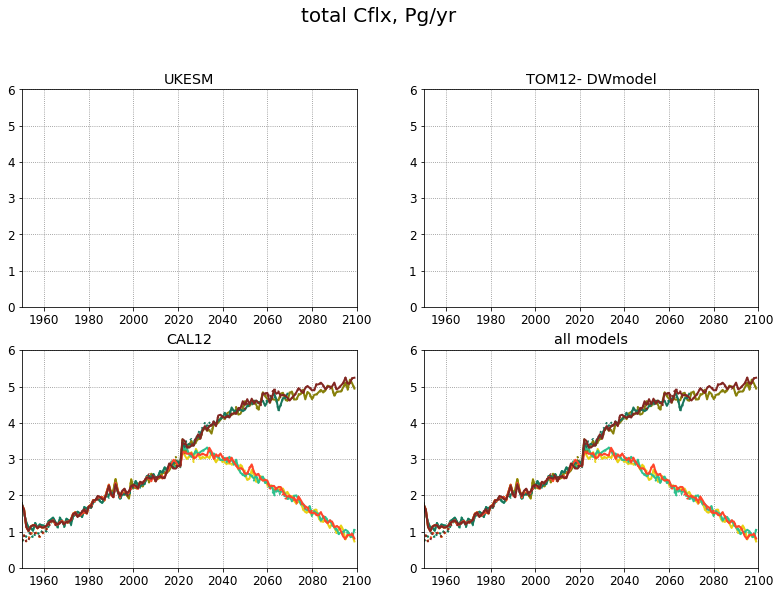

In [22]:
plt.figure()

models = ['1A','1B','2A','2B','3A','3B',\
         ]

# for i in range(0,6):#len(models)):
    
#     tmod = xr.open_dataset(f'./extracted-summary/Cflx_ukesm{models[i]}.nc')
#     plt.plot(tmod.year,tmod.Cflx, color = mod[models[i]]['color'])
    
fact = 1.1
fig, axs = plt.subplots(2,2, figsize=(12*fact, 8*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

for i in range(0,6):#len(models)):
    
#     tmod = xr.open_dataset(f'./extracted-summary/Cflx_ukesm{models[i]}.nc')
#     axs[0].plot(tmod.year,tmod.Cflx, color = mod[models[i]]['color'], label = mod[models[i]]['name'],\
#                 linestyle = ':', )
#     axs[0].legend(ncol = 3, fontsize = 10)
#     axs[3].plot(tmod.year,tmod.Cflx, color = mod[models[i]]['color'], \
#                 linestyle = ':', label = models[i])
    
#     tmod = xr.open_dataset(f'./extracted-summary/Cflx_tom_{models[i]}SA.nc')
#     axs[1].plot(tmod.year,tmod.Cflx, color = mod[models[i]]['color'], linestyle = '--', linewidth = 0.7)
#     axs[3].plot(tmod.year,tmod.Cflx, color = mod[models[i]]['color'], linestyle = '--', linewidth = 0.7)

    tmod = xr.open_dataset(f'./extracted-summary/Cflx_tom_{models[i]}A6.nc')
    axs[2].plot(tmod.year,tmod.Cflx, color = mod[models[i]]['color'], linestyle = '-', linewidth = 2)
    axs[3].plot(tmod.year,tmod.Cflx, color = mod[models[i]]['color'], linestyle = '-', linewidth = 2)

    tmod = xr.open_dataset(f'./extracted-summary/Cflx_tom_{models[i]}A7.nc')
    axs[2].plot(tmod.year,tmod.Cflx, color = mod[models[i]]['color'], linestyle = ':', linewidth = 2)
    axs[3].plot(tmod.year,tmod.Cflx, color = mod[models[i]]['color'], linestyle = ':', linewidth = 2)
    
tits = ['UKESM', 'TOM12- DWmodel', 'CAL12', 'all models']
for i in range(0,4):
    axs[i].grid(linestyle = ':', color = 'grey')
    axs[i].set_xlim([1950,2100])
    axs[i].set_ylim([0,6])
    axs[i].set_title(tits[i])
    
plt.suptitle('total Cflx, Pg/yr', y = 1.01, fontsize = 20)

4.3331016e-07
9.562699e-07


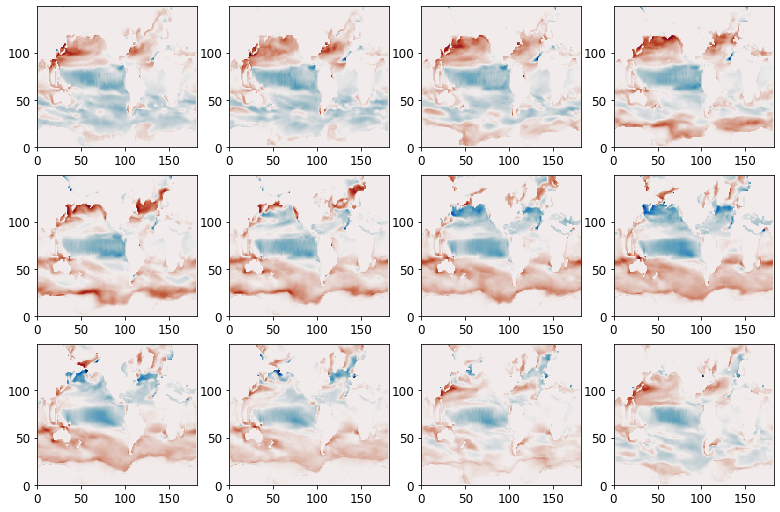

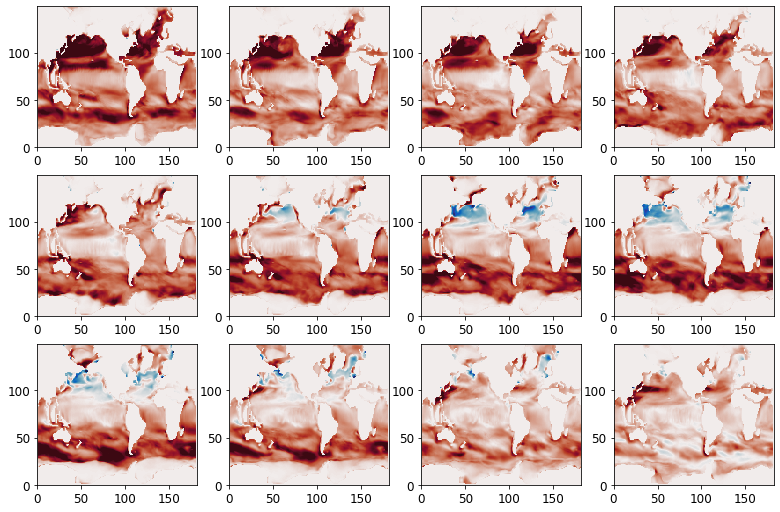

In [13]:
tdir = '/gpfs/home/mep22dku/scratch/ModelRuns/TOM12_TJ_1AA3/'
y = 2077
w = xr.open_dataset(f'{tdir}ORCA2_1m_{y}0101_{y}1231_diad_T.nc')
print(np.nanmax(w.Cflx.values))
fact = 1.1
fig, axs = plt.subplots(3,4, figsize=(12*fact, 8*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()
for i in range(0,12):
    axs[i].pcolormesh(w.Cflx[i,:,:], cmap = cm.balance, vmin = -4e-7, vmax = 4e-7)
    
tdir = '/gpfs/home/mep22dku/scratch/ModelRuns/TOM12_TJ_1AA3/'
y = 2078
w = xr.open_dataset(f'{tdir}ORCA2_1m_{y}0101_{y}1231_diad_T.nc')
print(np.nanmax(w.Cflx.values))
fact = 1.1
fig, axs = plt.subplots(3,4, figsize=(12*fact, 8*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()
for i in range(0,12):
    axs[i].pcolormesh(w.Cflx[i,:,:], cmap = cm.balance, vmin = -4e-7, vmax = 4e-7)

0.0013247356
0.0013247416


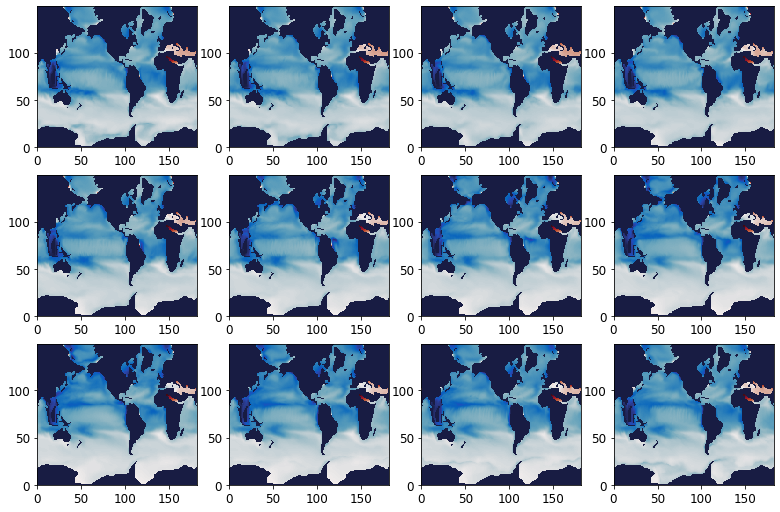

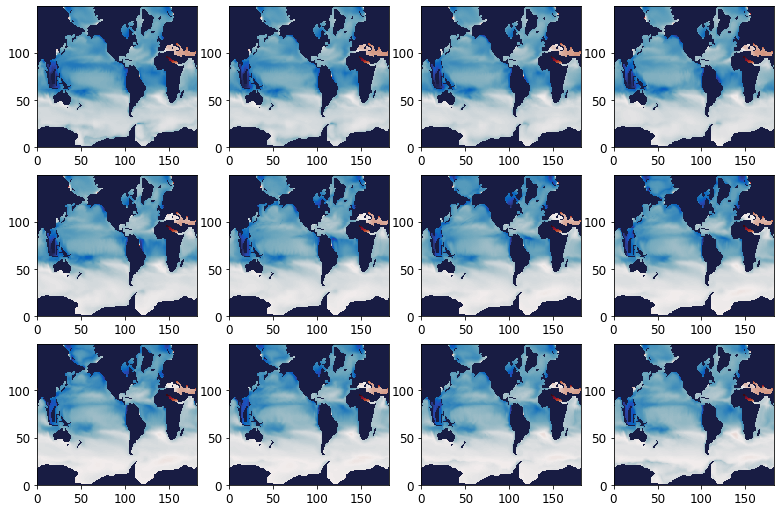

In [14]:
tdir = '/gpfs/home/mep22dku/scratch/ModelRuns/TOM12_TJ_1AA3/'
y = 2077
tvmi = 0.0018
tvma = 0.0028
w = xr.open_dataset(f'{tdir}ORCA2_1m_{y}0101_{y}1231_ptrc_T.nc')
print(np.nanmean(w.Alkalini.values))
fact = 1.1
fig, axs = plt.subplots(3,4, figsize=(12*fact, 8*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()
for i in range(0,12):
    axs[i].pcolormesh(w.DIC[i,0,:,:], cmap = cm.balance, vmin = tvmi, vmax = tvma)
    
tdir = '/gpfs/home/mep22dku/scratch/ModelRuns/TOM12_TJ_1AA3/'
y = 2078
w = xr.open_dataset(f'{tdir}ORCA2_1m_{y}0101_{y}1231_ptrc_T.nc')
print(np.nanmean(w.Alkalini.values))
fact = 1.1
fig, axs = plt.subplots(3,4, figsize=(12*fact, 8*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()
for i in range(0,12):
    axs[i].pcolormesh(w.DIC[i,0,:,:], cmap = cm.balance, vmin = tvmi, vmax = tvma)

<Figure size 432x288 with 0 Axes>

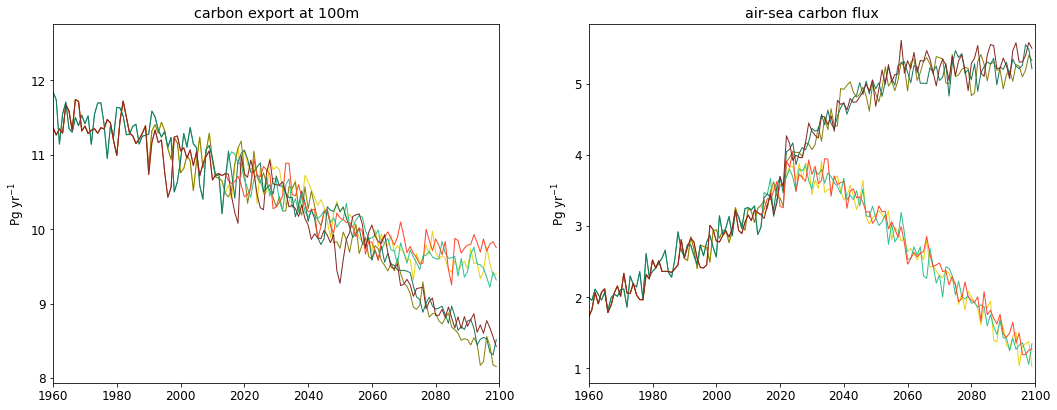

In [15]:
plt.figure()

models = ['1A','1B','2A','2B','3A','3B',\
         ]

# for i in range(0,6):#len(models)):
    
#     tmod = xr.open_dataset(f'./extracted-summary/Cflx_ukesm{models[i]}.nc')
#     plt.plot(tmod.year,tmod.Cflx, color = mod[models[i]]['color'])
    
xsi = 16
ysi = 6
    
fact = 1.1
fig, axs = plt.subplots(1,2, figsize=(xsi*fact, ysi*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

for i in range(0,6):#len(models)):

    
    tmod = xr.open_dataset(f'./extracted-summary/Cflx_tom_{models[i]}SA.nc')
    axs[1].plot(tmod.year,tmod.Cflx, color = mod[models[i]]['color'], linestyle = '-', linewidth = 1)

    
    tmod = xr.open_dataset(f'./extracted-summary/EXP_tom_{models[i]}SA.nc')
    axs[0].plot(tmod.year,tmod.EXP* 1e-15 * 12, color = mod[models[i]]['color'], linestyle = '-', linewidth = 1)

tits = ['carbon export at 100m', 'air-sea carbon flux']
for i in range(0,2):
    #axs[i].grid(linestyle = ':', color = 'grey')
    axs[i].set_xlim([1960,2100])
    #axs[i].set_ylim([0,6])
    axs[i].set_title(tits[i])
    axs[i].set_ylabel('Pg yr$^{-1}$')
    
#plt.suptitle('total Cflx, Pg/yr', y = 1.01, fontsize = 20)

<Figure size 432x288 with 0 Axes>

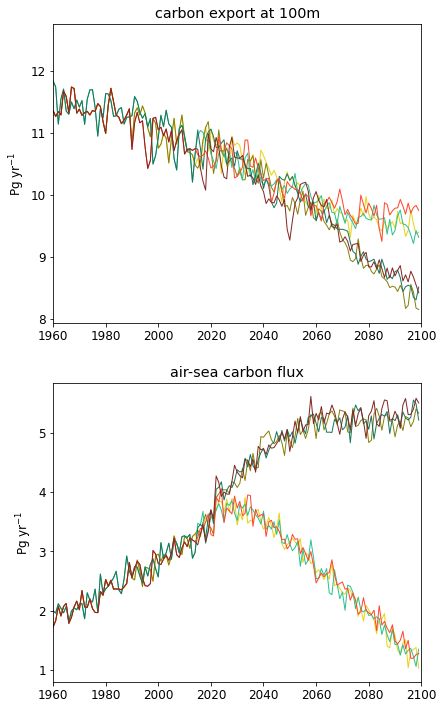

In [16]:
plt.figure()

models = ['1A','1B','2A','2B','3A','3B',\
         ]

# for i in range(0,6):#len(models)):
    
#     tmod = xr.open_dataset(f'./extracted-summary/Cflx_ukesm{models[i]}.nc')
#     plt.plot(tmod.year,tmod.Cflx, color = mod[models[i]]['color'])
    
xsi = 11
ysi = 6
    
fact = 1.1
fig, axs = plt.subplots(2,1, figsize=(ysi*fact, xsi*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

for i in range(0,6):#len(models)):

    
    tmod = xr.open_dataset(f'./extracted-summary/Cflx_tom_{models[i]}SA.nc')
    axs[1].plot(tmod.year,tmod.Cflx, color = mod[models[i]]['color'], linestyle = '-', linewidth = 1)

    
    tmod = xr.open_dataset(f'./extracted-summary/EXP_tom_{models[i]}SA.nc')
    axs[0].plot(tmod.year,tmod.EXP* 1e-15 * 12, color = mod[models[i]]['color'], linestyle = '-', linewidth = 1)

tits = ['carbon export at 100m', 'air-sea carbon flux']
for i in range(0,2):
    #axs[i].grid(linestyle = ':', color = 'grey')
    axs[i].set_xlim([1960,2100])
    #axs[i].set_ylim([0,6])
    axs[i].set_title(tits[i])
    axs[i].set_ylabel('Pg yr$^{-1}$')
    
#plt.suptitle('total Cflx, Pg/yr', y = 1.01, fontsize = 20)

In [17]:
ssp1 = pd.read_csv('/gpfs/data/greenocean/software/resources/SOZONE_atmo/atmco2_ssp1-26.dat', sep='\t')
ssp3 = pd.read_csv('/gpfs/data/greenocean/software/resources/SOZONE_atmo/atmco2_ssp3-70.dat',sep='\t')
gcb = pd.read_csv('/gpfs/home/mep22dku/scratch/GCB2023_atmco2/gcbco2_2023_4200_v2_padding.dat',sep='\t')

In [18]:
st = 4450
en = 4500
print(gcb[st:st+10])
print(ssp3[st:st+10])
print(ssp1[st:st+10])

      1650.042  276.58  277.682437   693.3
4450  2020.958  412.83       340.0  2088.0
4451  2021.042  413.35       341.0  2110.0
4452  2021.125  413.88       342.0  2132.0
4453  2021.208  414.24       343.0  2154.0
4454  2021.292  415.01       344.0  2177.0
4455  2021.375  415.25       345.0  2202.0
4456  2021.458  415.31       347.0  2227.0
4457  2021.542  414.54       348.0  2253.0
4458  2021.625  413.58       349.0  2281.0
4459  2021.708  413.19       350.0  2309.0
      1650.042  276.58  277.682437    693.3
4450  2020.958  412.83     331.962  1887.76
4451  2021.042  413.46     331.962  1887.76
4452  2021.125  414.22     331.962  1887.76
4453  2021.208  414.62     331.962  1887.76
4454  2021.500  418.46     332.000  1943.00
4455  2022.500  421.84     333.000  1963.00
4456  2023.500  425.28     334.000  1983.00
4457  2024.500  428.78     335.000  2003.00
4458  2025.500  432.35     337.000  2024.00
4459  2026.500  435.97     338.000  2045.00
      1650.042  276.58  277.682437    693.3

(1950.0, 2100.0)

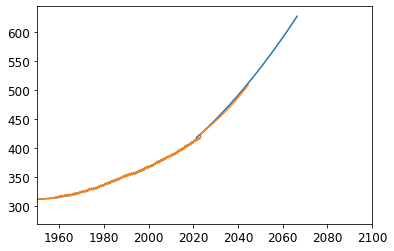

In [19]:
plt.figure()
st = 2500
en = 4500
# plt.plot(ssp1['1650.042'][st:en],ssp1['276.58'][st:en])
plt.plot(ssp3['1650.042'][st:en],ssp3['276.58'][st:en])
plt.plot(gcb['1650.042'][st:en],gcb['276.58'][st:en])
#plt.plot(gcb['1650.042'][st:en],gcb['276.58'][st:en]-ssp3['276.58'][st:en])
plt.xlim([1950,2100])

In [20]:
gcb

,1650.042,276.58,277.682437,693.3
0,1650.125,276.580,277.682437,693.293333
1,1650.209,276.590,277.682437,693.286667
2,1650.292,276.590,277.682437,693.280000
3,1650.375,276.590,277.682437,693.273333
4,1650.459,276.590,277.682437,693.266667
...,...,...,...,...
4948,2493.500,1961.577,527.000000,3481.000000
4949,2494.500,1961.577,527.000000,3481.000000
4950,2495.500,1961.577,527.000000,3481.000000
4951,2496.500,1961.577,527.000000,3481.000000
